<a href="https://colab.research.google.com/github/raquel-maia/python-dados/blob/main/Estat%C3%ADstica_Frequ%C3%AAncias_e_Medidas_DATA_ANALYTCS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pydataset --quiet #instalar biblioteca


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 42.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [ ]:
import pandas as pd


In [ ]:
import numpy as np

In [ ]:
import seaborn as sns #visualização de dados

In [ ]:
import matplotlib.pyplot as plt #visualização de dados

In [ ]:
import scipy.stats as stat #biblioteca para estatística

In [ ]:
from pydataset import data #para leitura de dados

initiated datasets repo at: /root/.pydataset/


In [ ]:
import requests

# URL do arquivo JSON
url = "https://import.cdn.thinkific.com/401289/gQbVuYr9TaimUX9dQAqV_enem_2023.json"

# Carregando o conteúdo do arquivo JSON e convertendo para DataFrame
dados_json = requests.get(url).json()
df = pd.DataFrame(dados_json)


In [ ]:
df.head()

,Linguagens,Ciências humanas,Ciências da natureza,Matemática,Redação,Sexo
0,585.669300,686.512178,390.482473,452.281333,546.371706,Homem
1,359.384608,642.084134,NaN,412.205207,741.825256,Mulher
2,622.732384,495.510719,443.183580,669.683401,684.515750,Homem
3,350.164605,602.041588,413.979810,676.608952,671.237114,Homem
4,384.093657,489.249140,609.758123,520.426698,744.375048,Homem


1. Qual das disciplinas tem a maior amplitude de nota?

In [ ]:
def maior_amplitude_disciplina(df):
    # Seleciona apenas as colunas que contêm valores numéricos
    colunas_numericas = df.select_dtypes(include=['number'])

    # Calcula a amplitude de nota para todas as disciplinas
    amplitudes = colunas_numericas.max() - colunas_numericas.min()

    # Encontra a disciplina com a maior amplitude de nota
    disciplina_com_maior_amplitude = amplitudes.idxmax()
    maior_amplitude = amplitudes.max()

    print(f"A disciplina com a maior amplitude de nota é {disciplina_com_maior_amplitude} com uma amplitude de {maior_amplitude:.2f}.")

maior_amplitude_disciplina(df)

A disciplina com a maior amplitude de nota é Redação com uma amplitude de 729.16.


2 - Qual é a média e a mediana para cada uma das disciplinas? (Lembre-se
de remover todos os valores nulos quando considerar a mediana)

In [ ]:
def disciplina_media(df):
    colunas_numericas = df.select_dtypes(include=['number'])

    # Remover linhas com valores nulos para calcular a média
    colunas_sem_nulos = colunas_numericas.dropna()


    calcular_media = colunas_sem_nulos.mean()

    # Calcular mediana após remover valores nulos
    calcular_mediana = colunas_sem_nulos.median()


    # DataFrame para média e mediana
    df_media = pd.DataFrame(calcular_media, columns=["Média"])
    df_mediana = pd.DataFrame(calcular_mediana, columns=["Mediana"])

    # Concatenar DataFrames horizontalmente
    media_mediana_lado_a_lado = pd.concat([df_media, df_mediana], axis=1)

    print(media_mediana_lado_a_lado)

disciplina_media(df)

                           Média     Mediana
Linguagens            517.467162  517.128831
Ciências humanas      528.351454  528.503263
Ciências da natureza  502.142101  502.935209
Matemática            537.172480  532.961486
Redação               641.193123  639.602691


3. Considerando o curso de Ciência da Computação da UFPE, onde o peso cada uma das disciplinas ponderado:

    a)  Redação-2

    b)  Matemática e suas Tecnologias - 4

    c)  Linguagens, Códigos e suas Tecnologias - 2

    d) Ciências Humanas e suas Tecnologias - 1

    e) Ciências da Natureza e suas Tecnologias - 1

Qual o desvio padrão e média das notas dos 500 estudantes mais bem colocados considerando esses pesos?



In [ ]:
# Carregando o conteúdo do arquivo JSON e convertendo para DataFrame
dados_json = requests.get(url).json()
df = pd.DataFrame(dados_json)

# Criar uma cópia do DataFrame original
df_novo = df.copy()

pesos = {
    'Redação': 2,
    'Matemática': 4,
    'Linguagens': 2,
    'Ciências humanas': 1,
    'Ciências da natureza': 1
}


df_novo['Nota_ponderada_total'] = (
    df_novo['Redação'] * pesos['Redação'] +
    df_novo['Matemática'] * pesos['Matemática'] +
    df_novo['Linguagens'] * pesos['Linguagens'] +
    df_novo['Ciências humanas'] * pesos['Ciências humanas'] +
    df_novo['Ciências da natureza'] * pesos['Ciências da natureza']
)


df_novo_ordenado = df_novo.sort_values(by='Nota_ponderada_total', ascending=False)


notas_500_melhores_novo = df_novo_ordenado.head(500)['Nota_ponderada_total']


media_novo = notas_500_melhores_novo.mean()


desvio_padrao_novo = notas_500_melhores_novo.std()

print("Média das notas dos 500 estudantes mais bem colocados (Novo DataFrame):", media_novo)
print("Desvio padrão das notas dos 500 estudantes mais bem colocados (Novo DataFrame):", desvio_padrao_novo)



Média das notas dos 500 estudantes mais bem colocados (Novo DataFrame): 5572.896772018768
Desvio padrão das notas dos 500 estudantes mais bem colocados (Novo DataFrame): 404.3586629946426


4. Se todos esses estudantes aplicassem para ciência da computação e
existem apenas 40 vagas, qual seria a variância e média da nota dos
estudantes que entraram no curso de ciência da computação?


In [ ]:
def estudante_vari(df_novo):
    # Selecionar apenas as notas dos estudantes que entraram no curso de ciência da computação
    notas_aceitos = df_novo.head(40)['Nota_ponderada_total']

    # Calcular a média das notas dos estudantes que entraram no curso
    media_aceitos = notas_aceitos.mean()

    # Calcular a variância das notas dos estudantes que entraram no curso
    variancia_aceitos = notas_aceitos.var()

    return media_aceitos, variancia_aceitos

media_aceitos, variancia_aceitos = estudante_vari(df_novo)
print("Média das notas dos estudantes que entraram no curso de Ciência da Computação:", media_aceitos)
print("Variância das notas dos estudantes que entraram no curso de Ciência:",variancia_aceitos )

Média das notas dos estudantes que entraram no curso de Ciência da Computação: 5499.259630365142
Variância das notas dos estudantes que entraram no curso de Ciência: 318402.6239670603


5. Qual o valor do teto do terceiro quartil para as disciplinas de
matemática e linguagens?

In [ ]:
q3_matematica = df['Matemática'].quantile(0.75)
q3_linguagens = df['Linguagens'].quantile(0.75)

# Calcular o teto do terceiro quartil
teto_q3_matematica = np.ceil(q3_matematica)
teto_q3_linguagens = np.ceil(q3_linguagens)

print("Teto do terceiro quartil para Matemática:", teto_q3_matematica)
print("Teto do terceiro quartil para Linguagens:", teto_q3_linguagens)

Teto do terceiro quartil para Matemática: 593.0
Teto do terceiro quartil para Linguagens: 572.0


6 - Faça o histograma de Redação e Linguagens, de 20 em 20 pontos.
Podemos dizer que são histogramas simétricos, justifique e classifique
se não assimétricas?

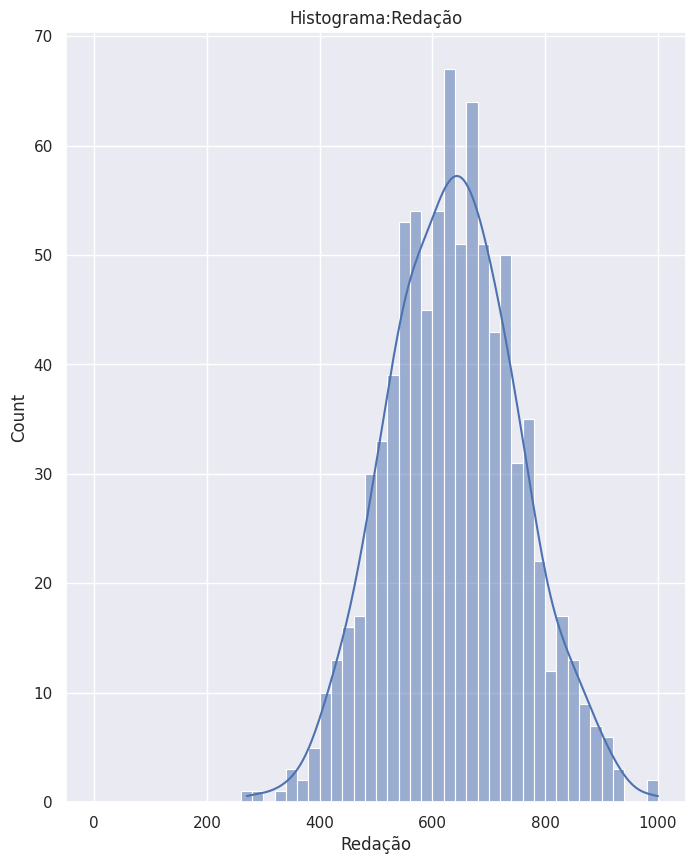

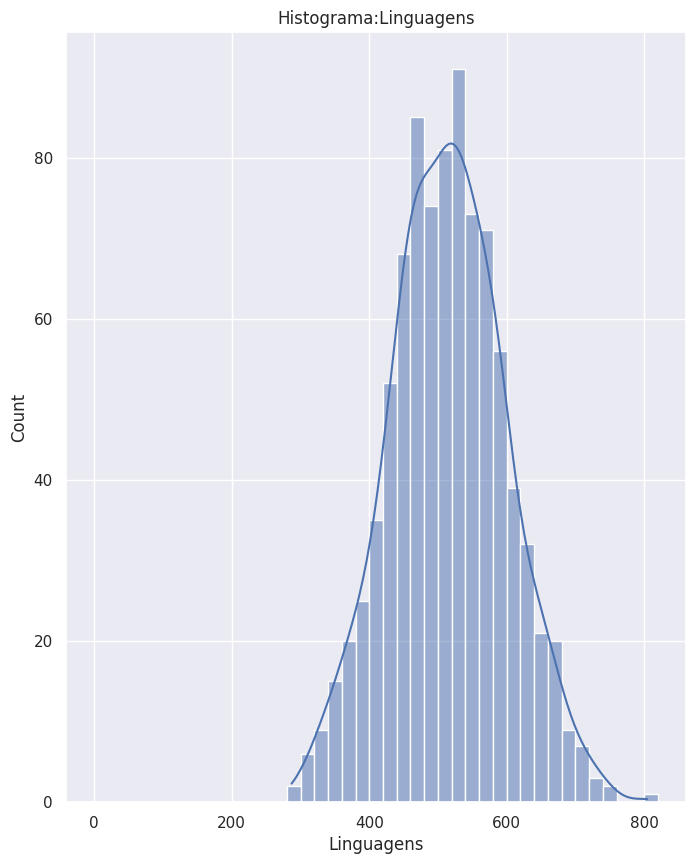

In [ ]:
plt.rcParams['figure.figsize'] = [8 ,10]
sns.set_theme()

for column in ["Redação", "Linguagens"]:
  plt.figure()
  sns.histplot(data=df, x=column, bins=range(0, df[column].max().astype(int) + 20, 20), kde=True)
  plt.title("Histograma:" +column)

- O valor de redação acima é simetricos pois o valor está concentrado central
- Já o valor de linguagens é assimetrico pois existe uma calda a direita=

7. Agora coloque um range fixo de 0 até 1000, você ainda tem a mesma
opinião quanto a simetria? [plt.hist(dado, bins=_, range=[0, 1000])


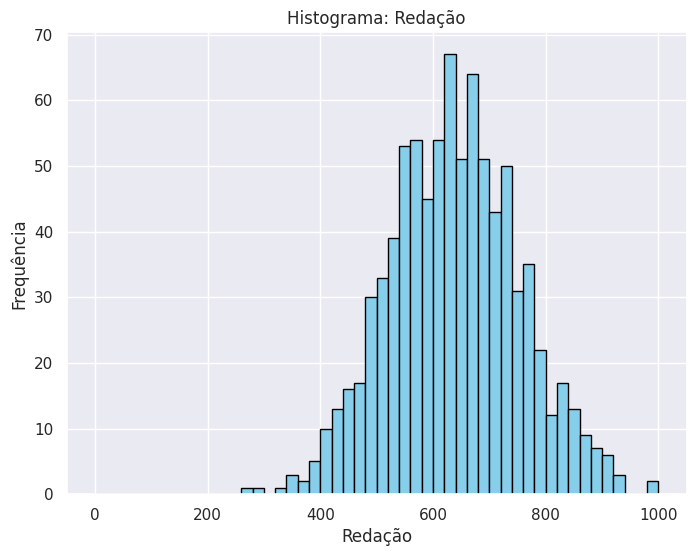

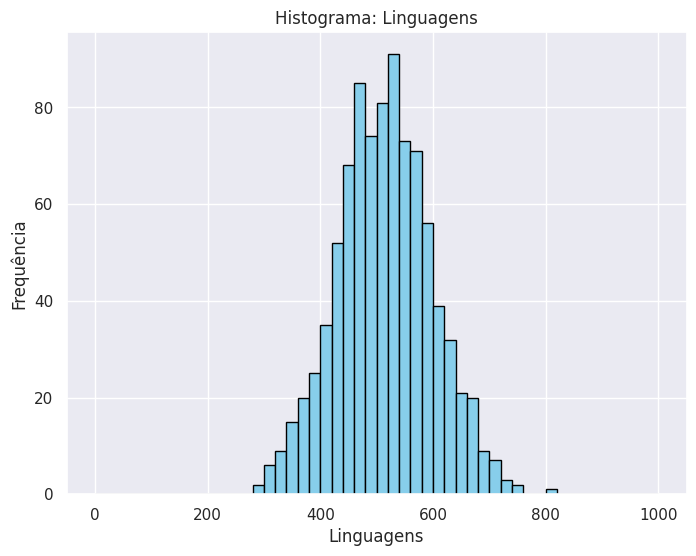

In [ ]:
plt.rcParams['figure.figsize'] = [8, 6]

for column in ["Redação", "Linguagens"]:
    plt.figure()
    plt.hist(df[column], bins=range(0, 1001, 20), color='skyblue', edgecolor='black')
    plt.title("Histograma: " + column)
    plt.xlabel(column)
    plt.ylabel("Frequência")
    plt.grid(True)

plt.show()

a concentração dos dados está mais intensa em um dos lados do centro e diminuir gradualmente em direção aos extremos do intervalo, então os histogramas seriam assimétricos.

8 - Faça um boxplot do quartil de todas as disciplinas de ciências da
natureza e redação. É possível enxergar outliers? Utilize o método IQR.

Índices dos outliers: Index(['9', '325', '482', '483', '545', '720', '870'], dtype='object')


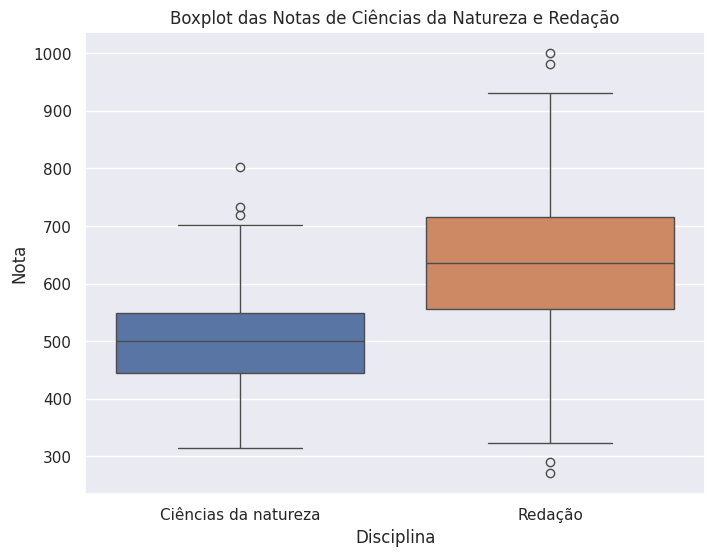

In [ ]:
colunas_selecionadas = ['Ciências da natureza', 'Redação']
dados_selecionados = df[colunas_selecionadas]

# Criar o boxplot
sns.boxplot(data=dados_selecionados)
plt.title('Boxplot das Notas de Ciências da Natureza e Redação')
plt.xlabel('Disciplina')
plt.ylabel('Nota')

# Calcular o intervalo interquartil (IQR)
Q1 = dados_selecionados.quantile(0.25)
Q3 = dados_selecionados.quantile(0.75)
IQR = Q3 - Q1

# Identificar outliers
outliers = ((dados_selecionados < (Q1 - 1.5 * IQR)) | (dados_selecionados > (Q3 + 1.5 * IQR))).any(axis=1)
outliers_indices = dados_selecionados[outliers].index

# Exibir os índices dos outliers
print("Índices dos outliers:", outliers_indices)

plt.show()

Os estudantes têm notas consideradas como outliers nas disciplinas de Ciências da Natureza e/ou Redação, com base no método do intervalo interquartil (IQR).

9 - Remova todos os outliers e verifique se eles são passíveis de alterar a
média nacional significativamente? (considere significativamente um
valor acima de 5%)


Índices dos outliers: Index(['9', '325', '482', '483', '545', '720', '870'], dtype='object')
Os outliers não têm um impacto significativo na média nacional.
Diferença percentual na média nacional após a remoção dos outliers: -0.047930510708529044


<ipython-input-31-0c356ac72dd8>:27: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  media_nacional_antes = df.mean().mean()
<ipython-input-31-0c356ac72dd8>:28: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  media_nacional_depois = df_sem_outliers.mean().mean()


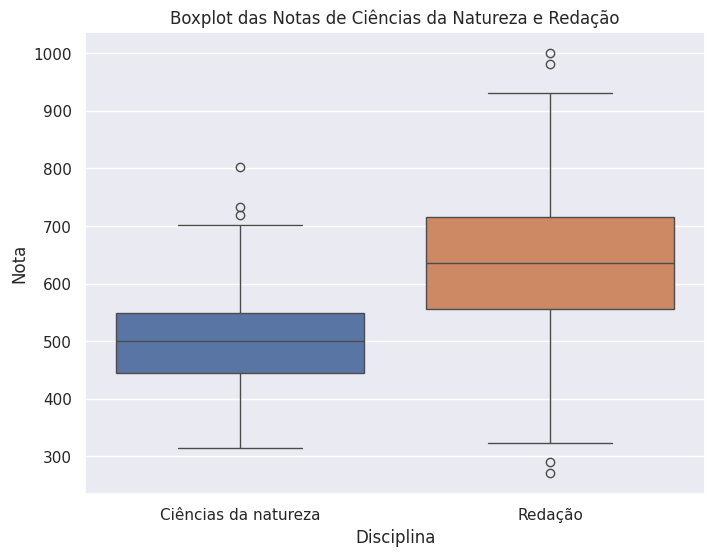

In [ ]:


# Selecionar apenas as colunas de Ciências da Natureza e Redação
colunas_selecionadas = ['Ciências da natureza', 'Redação']
dados_selecionados = df[colunas_selecionadas]

# Criar o boxplot
sns.boxplot(data=dados_selecionados)
plt.title('Boxplot das Notas de Ciências da Natureza e Redação')
plt.xlabel('Disciplina')
plt.ylabel('Nota')

# Calcular o intervalo interquartil (IQR)
Q1 = dados_selecionados.quantile(0.25)
Q3 = dados_selecionados.quantile(0.75)
IQR = Q3 - Q1

# Identificar outliers
outliers = ((dados_selecionados < (Q1 - 1.5 * IQR)) | (dados_selecionados > (Q3 + 1.5 * IQR))).any(axis=1)
outliers_indices = dados_selecionados[outliers].index

# Exibir os índices dos outliers
print("Índices dos outliers:", outliers_indices)

# Remover os outliers
df_sem_outliers = df.drop(outliers_indices)

# Calcular a média nacional antes e depois da remoção dos outliers
media_nacional_antes = df.mean().mean()
media_nacional_depois = df_sem_outliers.mean().mean()

# Calcular a diferença percentual na média nacional
diferenca_percentual = ((media_nacional_depois - media_nacional_antes) / media_nacional_antes) * 100

# Verificar se a diferença percentual é superior a 5%
if diferenca_percentual > 5:
    print("Os outliers têm um impacto significativo na média nacional.")
else:
    print("Os outliers não têm um impacto significativo na média nacional.")

print("Diferença percentual na média nacional após a remoção dos outliers:", diferenca_percentual)

plt.show()



10. Considerando valores nulos, tente encontrar qual seria a melhor medida
de tendência que pode substituir as notas nulas. Média, moda ou
mediana? Substitua o valor por todos os três e diga qual delas altera
menos a média geral e o desvio padrão

In [ ]:
# Seleciona apenas as colunas numéricas do DataFrame
colunas_numericas = df.select_dtypes(include=['number'])

# Calcula a média, moda e mediana para substituir os valores nulos
media_substituicao = colunas_numericas.mean()
moda_substituicao = colunas_numericas.mode().iloc[0]
mediana_substituicao = colunas_numericas.median()

# Substitui os valores nulos pelas medidas de tendência central
df_media = colunas_numericas.fillna(media_substituicao)
df_moda = colunas_numericas.fillna(moda_substituicao)
df_mediana = colunas_numericas.fillna(mediana_substituicao)

# Calcula a média geral e o desvio padrão para cada substituição
media_geral_media = df_media.stack().mean()
media_geral_moda = df_moda.stack().mean()
media_geral_mediana = df_mediana.stack().mean()

desvio_padrao_media = df_media.stack().std()
desvio_padrao_moda = df_moda.stack().std()
desvio_padrao_mediana = df_mediana.stack().std()

# Compara o impacto na média geral e no desvio padrão
diferenca_media = {'Média': abs(media_geral_media - colunas_numericas.stack().mean()),
                   'Moda': abs(media_geral_moda - colunas_numericas.stack().mean()),
                   'Mediana': abs(media_geral_mediana - colunas_numericas.stack().mean())}

diferenca_desvio_padrao = {'Média': abs(desvio_padrao_media - colunas_numericas.stack().std()),
                           'Moda': abs(desvio_padrao_moda - colunas_numericas.stack().std()),
                           'Mediana': abs(desvio_padrao_mediana - colunas_numericas.stack().std())}

# Determina qual medida altera menos a média geral e o desvio padrão
melhor_media = min(diferenca_media, key=diferenca_media.get)
melhor_desvio_padrao = min(diferenca_desvio_padrao, key=diferenca_desvio_padrao.get)

print("Alteração na média geral:")
print(diferenca_media)
print("\nAlteração no desvio padrão:")
print(diferenca_desvio_padrao)
print("\nMelhor medida de tendência central para substituir valores nulos:", melhor_media, "para média geral e", melhor_desvio_padrao, "para desvio padrão.")



Alteração na média geral:
{'Média': 0.2552456756518495, 'Moda': 27.536353020701767, 'Mediana': 0.1630624524873383}

Alteração no desvio padrão:
{'Média': 4.085493248982374, 'Moda': 21.847843031636984, 'Mediana': 4.165069279473059}

Melhor medida de tendência central para substituir valores nulos: Mediana para média geral e Média para desvio padrão.
